In [39]:
import iGS
import GSx
import GSy
import Uncertainty
from Random import RandomSampling
from utils import get_input
from utils import normalized_data
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Hyperparameters
numDataTotal = 509
labeledPoolN = 10
batchSz = 1
nAccs = (numDataTotal-labeledPoolN)//batchSz
RepeatTimes = 2
# Get the input files
myfile =r'Data/CombinedPSP.csv'
X, y = get_input(myfile)

def main(save=False):
    # Run different algorithms to get model performance and labeled data pool
    R2Smooth_std1, accuracySmooth1, InfoSmooth_std1, InfoSmooth_mean1,\
    MSEsmooth_std1,MSEsmooth1,MAEsmooth_std1, MAEsmooth1,\
    R2_train_std1, R2_train_mean1, R2_train_stdS1, R2_train_meanS1, SelectData1 = RandomSampling(X, y, labeledPoolN, runs=RepeatTimes)
    
    # R2Smooth_std2, accuracySmooth2, InfoSmooth_std2, InfoSmooth_mean2,\
    # MSEsmooth_std2,MSEsmooth2,MAEsmooth_std2, MAEsmooth2,\
    # R2_train_std2, R2_train_mean2, R2_train_stdS2, R2_train_meanS2, SelectData2 = Uncertainty(X, y, runs=RepeatTimes )
    
    # R2Smooth_std3, accuracySmooth3, InfoSmooth_std3, InfoSmooth_mean3,\
    # MSEsmooth_std3,MSEsmooth3,MAEsmooth_std3, MAEsmooth3,\
    # R2_train_std3, R2_train_mean3, R2_train_stdS3, R2_train_meanS3, SelectData3 = GSx(X, y, runs=RepeatTimes)

    # R2Smooth_std4, accuracySmooth4, InfoSmooth_std4, InfoSmooth_mean4,\
    # MSEsmooth_std4,MSEsmooth4,MAEsmooth_std4, MAEsmooth4,\
    # R2_train_std4, R2_train_mean4, R2_train_stdS4, R2_train_meanS4, SelectData4 = GSy(X, y, runs=RepeatTimes)
    
    # R2Smooth_std5, accuracySmooth5, InfoSmooth_std5, InfoSmooth_mean5,\
    # MSEsmooth_std5,MSEsmooth5,MAEsmooth_std5, MAEsmooth5,\
    # R2_train_std5, R2_train_mean5, R2_train_stdS5, R2_train_meanS5, SelectData5 = iGS(X, y, runs=RepeatTimes)

    # Save data
    # if save:
    return R2Smooth_std1, accuracySmooth1, InfoSmooth_std1, InfoSmooth_mean1,\
    MSEsmooth_std1,MSEsmooth1,MAEsmooth_std1, MAEsmooth1,\
    R2_train_std1, R2_train_mean1, R2_train_stdS1, R2_train_meanS1, SelectData1
    
    # Plotting
    ...
    




In [13]:
R2Smooth_std1, accuracySmooth1, InfoSmooth_std1, InfoSmooth_mean1,\
    MSEsmooth_std1,MSEsmooth1,MAEsmooth_std1, MAEsmooth1,\
    R2_train_std1, R2_train_mean1, R2_train_stdS1, R2_train_meanS1, SelectData1=main()

  0%|          | 0/2 [00:00<?, ?it/s]

Info.shape: (1, 1)
R2.shape (1, 1)
InfoRes [[0.27790348]]


 50%|█████     | 1/2 [03:51<03:51, 231.42s/it]

Info.shape: (1, 1)
R2.shape (1, 1)
InfoRes [[0.39778395]]


100%|██████████| 2/2 [07:44<00:00, 232.50s/it]


In [18]:
MAEsmooth1.shape
MAEsmooth_std1.shape

(410, 1)

In [15]:
SelectData1[0].shape

(419, 6)

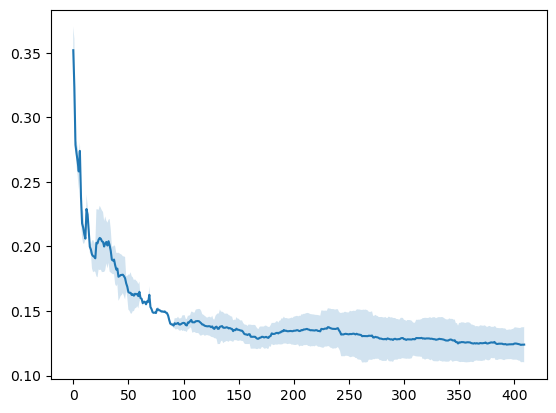

In [22]:
x_values = np.arange(len(MAEsmooth1))

plt.plot(x_values, MAEsmooth1)
plt.fill_between(x_values, (MAEsmooth1+MAEsmooth_std1).flatten(), (MAEsmooth1-MAEsmooth_std1).flatten(), alpha=0.2)

In [ ]:
# trying errorbar?

# Assuming you have y-axis data in MAEsmooth1 and error data in MAEsmooth_std1
ylog = False  # Set to True if using a logarithmic scale

fig, ax = plt.subplots()

offset = 10
error_freq = 5

for i, (y, e) in enumerate(zip(MAEsmooth1, MAEsmooth_std1)):
    x = np.arange(len(y))

    if ylog:
        p = ax.semilogy(x, y, label=f'Data {i}', lw=3)
    else:
        p = ax.plot(x, y, label=f'Data {i}', lw=3)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    ax.errorbar(xe, ye, yerr=ee, alpha=0.5, ls='none', ecolor=p[0].get_color(), elinewidth=3, capsize=4, capthick=3)
    offset += 5

plt.xlabel('X-axis')
plt.ylabel('MAE Smooth')
plt.title('MAE Smooth with Error Bars')
plt.legend()
plt.grid(True)

plt.show()


In [37]:
results = {
    'R2Smooth_std1': R2Smooth_std1,
    'accuracySmooth1': accuracySmooth1,
    'InfoSmooth_std1': InfoSmooth_std1,
    'InfoSmooth_mean1': InfoSmooth_mean1,
    'MSEsmooth_std1': MSEsmooth_std1,
    'MSEsmooth1': MSEsmooth1,
    'MAEsmooth_std1': MAEsmooth_std1,
    'MAEsmooth1': MAEsmooth1,
    'R2_train_std1': R2_train_std1,
    'R2_train_mean1': R2_train_mean1,
    'R2_train_stdS1': R2_train_stdS1,
    'R2_train_meanS1': R2_train_meanS1,
    'SelectData1': SelectData1
}

In [47]:
len(results)

13

In [45]:
# Define the path to your local folder and filename
folder_path = 'Results_Data/'
file_name = f'results_data_{current_date_time}.pkl'

In [46]:
# Save the results to a file in the specified folder
with open(folder_path + file_name, 'wb') as file:
    pickle.dump(results, file)

In [42]:
current_date_time = datetime.now().strftime("%Y-%m-%d_%H-%M")
print("Current date and time:", current_date_time)

Current date and time: 2023-12-13_11-15
